## Observations and Insights 

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
merge_df=pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")

# Display the data table for preview
merge_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [34]:
# Checking the number of mice.
mice_total=merge_df["Mouse ID"].count()
print(mice_total)

1893


In [35]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows=merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])]
(duplicate_rows)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [36]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_rows=merge_df[merge_df.duplicated(['Mouse ID'])]
(all_duplicate_rows)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [37]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merge_df.drop_duplicates(subset=["Mouse ID", 'Timepoint'], keep='last')
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [38]:
# Checking the number of mice in the clean DataFrame.
new_mice_total=clean_df["Mouse ID"].count()
print(new_mice_total)

1888


## Summary Statistics

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean=clean_df.groupby("Drug Regimen") ['Tumor Volume (mm3)'].mean()
median=clean_df.groupby("Drug Regimen") ['Tumor Volume (mm3)'].median()
variance=clean_df.groupby("Drug Regimen") ['Tumor Volume (mm3)'].var()
standard_deviation=clean_df.groupby("Drug Regimen") ['Tumor Volume (mm3)'].std()
sem=clean_df.groupby("Drug Regimen") ['Tumor Volume (mm3)'].sem()

regimen_summary_df=pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_deviation, "SEM": sem})
regimen_summary_df



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

              Drug Regimen
Drug Regimen              
Capomulin              230
Ceftamin               178
Infubinol              178
Ketapril               188
Naftisol               186
Placebo                181
Propriva               156
Ramicane               228
Stelasyn               181
Zoniferol              182


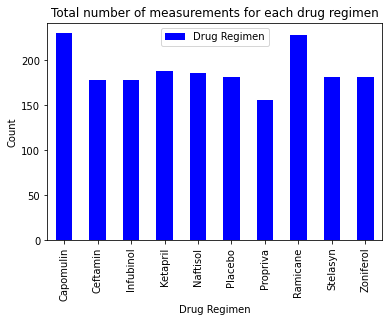

In [47]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_regimen=clean_df.groupby("Drug Regimen")

drug_regimen_count=pd.DataFrame(drug_regimen["Drug Regimen"].count())
print(drug_regimen_count)

bar_chart=drug_regimen_count.plot(kind='bar', title="Total number of measurements for each drug regimen", color="blue")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

plt.show()



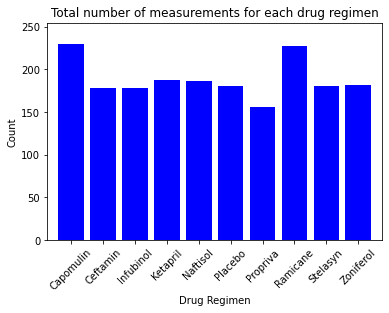

In [57]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drugs=["Capomulin", "Ceftamin", "Infubinol","Ketapril","Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
y_axis=[230, 178, 178, 188, 186, 181, 156, 228, 181, 182]
x_axis=np.arange(len(y_axis))


plt.bar(x_axis, y_axis, color="blue", align="center")
tick_locations=[value for value in x_axis]
plt.xticks(rotation=45)
plt.xticks(tick_locations, drugs)
plt.xlim(-.75,len(x_axis)-.25)
plt.ylim(0,max(y_axis)+25)
plt.title("Total number of measurements for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.show()



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
#four_regimens=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
#tumor_volume=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#for regimen in four_regimens:
    #tumor_volume=df_four_regimens.loc[df_four_regimens['Drug Regimen']]== Regimen, 'Tumor          #Volume (mm3)'
    #tumor_volume.append(tumor_volume)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
